# Introduction to Deep Learning

-----

In this notebook, we introduce deep learning by analyzing a familiar data set, the handwritten digit data we have classified earlier in this course by using a variety of methods. Deep learning is a vast and growing subject, thus in one lesson (and corresponding notebook) we will not be able to cover the full range of topics or techniques. Instead, in this notebook, we focus on actually building and applying deep learning models to a data set. We will use the [Keras][kdl] deep learning framework in this Notebook since it is simple to apply and follows a scikit learn interface (create estimator, fit, and predict). 

To get started, we will first read in the digit data, before splitting the data into a training and testing data sets. Finally, we will flatten the data to simplify the application of a simple deep learning model.  

-----
[kdl]: http://keras.io

## Table of Contents

[Handwritten Digit Data](#Handwritten-Digit-Data)

[Constructing a Model](#Constructing-a-Model)

- [Model Compilation](#ModelCompilation)

- [Model Performance](#Model-Performance)

[Constructing a Complex Model](#Constructing-a-Complex-Model)

[Blind Testing](#Blind-Testing)

-----

Before proceeding with the rest of this notebook, we first have our standard notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Handwritten Digit Data

To demonstrate the application of deep learning, we will use the handwritten digit data set. We have analyzed these data in previous lessons, and traditional machine learning algorithms generally perform well on the digit classification task. In the following Code cells, we load these data and visualize a number of digit images. Next, we split the data into training and testing samples, before finally completing the data pre-processing by defining the data types, normalizing the data, and defining categorical types for the labels.

-----

Total number of samples = 1797


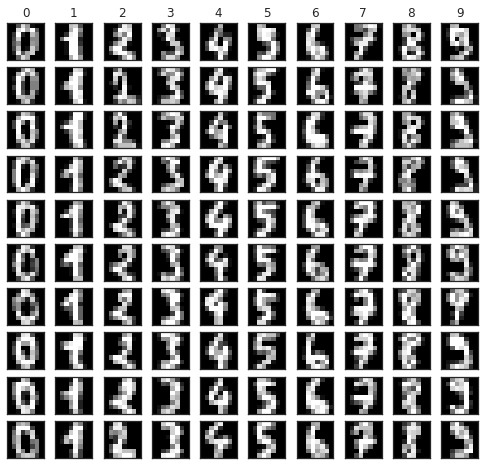

In [2]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=.25)

# Get sizes
train_dim_one = x_train.shape[0]
train_dim_two = x_train.shape[1]
test_dim_one = x_test.shape[0]

In [4]:
num_classes = 10
max_pixel = 16

# Flatten image arrays
x_train = x_train.reshape(train_dim_one, train_dim_two)
x_test = x_test.reshape(test_dim_one, train_dim_two)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize image arrays
x_train /= max_pixel
x_test /= max_pixel

print('{:5d} train samples'.format(x_train.shape[0]))
print('{:5d} test samples'.format(x_test.shape[0]))

# convert class vectors to binary class matrices
from keras.utils import np_utils

y_trainc = np_utils.to_categorical(y_train, num_classes)
y_testc = np_utils.to_categorical(y_test, num_classes)

 1347 train samples
  450 test samples


Using TensorFlow backend.


-----

[[Back to TOC]](#Table-of-Contents)

## Constructing a Model

Constructing a deep learning model, at this point, is much harder than constructing a scikit learn model. In large part, this is because we must define the complete nature of the model. This includes the number and types of hidden [layers][kl] in the deep learning model, how the layers will be interconnected, whether or not convolutions will be applied, and the types of [activation functions][kf] that should be applied to the outputs of any given layer. To demonstrate this process, we first start with a simple one layer model that maps our input data into ten classes and uses a simple activation function.

-----
[kl]: http://keras.io/layers/core/
[kf]: http://keras.io/activations/

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Build single layer model
model = Sequential()
model.add(Dense(10, input_dim=train_dim_two))
model.add(Activation('softmax'))

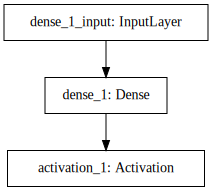

In [6]:
# Display model flowchart
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
# Display text representation of Keras model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


-----

[[Back to TOC]](#Table-of-Contents)


### [Model Compilation][km]

Once we have built a suitable model, we compile the model to generate results more quickly. By default, Keras will use the [Theano][th] backend, which means our model can be compiled to leverage CPUs or GPUs (with suitable flags passed to Theano). Another backend option for Keras is Google's [TensorFlow][tf]. The development team recently announced that development of the Theano library will no longer continue, thus we now prefer to use the TensorFlow backend.

After we have compiled the model, we can fit the model to our training data. We can also provide validation data to quantify the performance of the fitting, however, in this case we specify the fraction of training data to be held out for internal validation via the `validation_split` parameter. We provide two additional parameters in the model fitting process: batch size, and number of epochs. The batch size controls how many data values are fit at any update step, and number of epochs controls how many steps should be used to revise the weights in hidden layers.

-----
[km]: http://keras.io/models/sequential/
[th]: http://www.deeplearning.net/software/theano
[tf]: https://www.tensorflow.org

In [8]:
from keras.optimizers import RMSprop

# compile model, using categorical values (i.e., our ten class labels)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
# Fit model
batch_size = 25
num_epoch = 5
val_spl = 0.2

# Train model, use last part of training data to validate
history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, epochs=num_epoch,
                    verbose=1, validation_split = val_spl)

Train on 1077 samples, validate on 270 samples
Epoch 1/5
1077/1077 [==============================] - 0s 109us/step - loss: 2.2544 - acc: 0.1272 - val_loss: 2.0965 - val_acc: 0.2037
Epoch 2/5
1077/1077 [==============================] - 0s 52us/step - loss: 2.0180 - acc: 0.2962 - val_loss: 1.9170 - val_acc: 0.4704
Epoch 3/5
1077/1077 [==============================] - 0s 59us/step - loss: 1.8399 - acc: 0.5162 - val_loss: 1.7558 - val_acc: 0.6111
Epoch 4/5
1077/1077 [==============================] - 0s 51us/step - loss: 1.6822 - acc: 0.6583 - val_loss: 1.6076 - val_acc: 0.7296
Epoch 5/5
1077/1077 [==============================] - 0s 64us/step - loss: 1.5359 - acc: 0.7419 - val_loss: 1.4674 - val_acc: 0.7630


-----

[[Back to TOC]](#Table-of-Contents)

### Model Performance

Our model has internal performance metrics, and also can be applied to unseen data in order to quantify its robustness. We can obtain score metrics by calling the `evaluate` method on our model and passing in unseen test data. We also can obtain class predictions and generate a confusion matrix, which simplifies the comparison of this simple model with our previous machine learning classification models for these data. Even with this simple model, our deep learning approach provides reasonable results.

-----

In [10]:
# Obtain score results (we set verbose to 0 
# to hide informational messages)
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

Test score: 1.497
Test accuracy: 0.747


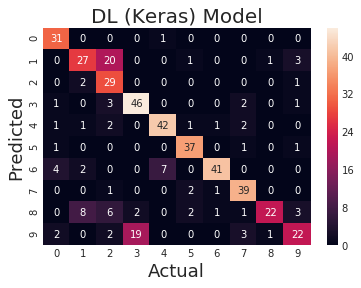

In [11]:
# Obtain test predictions
y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
from helper_code import mlplots as mlp

nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

[[Back to TOC]](#Table-of-Contents)

## Constructing a Complex Model

While our simple model performed adequately, the power of deep learning is in building more complex models to capture finer details present in the data. Below we build a more complex model that use three layers (specified by the [`Dense`][ke] layers). We employ different activation functions as well as [`Dropout`][kd] steps, which help prevent overfitting by randomly setting inputs to zero at each update step. Otherwise, we retain the same code as before (although we do use more epochs). In the end, the results are better, especially as shown in the confusion matrix.

-----
[ke]: http://keras.io/layers/core/#dense
[kd]: http://keras.io/layers/core/#dropout

Train on 1077 samples, validate on 270 samples
Epoch 1/10
1077/1077 [==============================] - 0s 157us/step - loss: 1.7891 - acc: 0.4215 - val_loss: 1.0019 - val_acc: 0.8259
Epoch 2/10
1077/1077 [==============================] - 0s 80us/step - loss: 0.9319 - acc: 0.7744 - val_loss: 0.5545 - val_acc: 0.8889
Epoch 3/10
1077/1077 [==============================] - 0s 83us/step - loss: 0.5935 - acc: 0.8533 - val_loss: 0.3295 - val_acc: 0.9222
Epoch 4/10
1077/1077 [==============================] - 0s 85us/step - loss: 0.4114 - acc: 0.9044 - val_loss: 0.2301 - val_acc: 0.9519
Epoch 5/10
1077/1077 [==============================] - 0s 84us/step - loss: 0.3372 - acc: 0.9071 - val_loss: 0.1812 - val_acc: 0.9556
Epoch 6/10
1077/1077 [==============================] - 0s 79us/step - loss: 0.2891 - acc: 0.9164 - val_loss: 0.1868 - val_acc: 0.9481
Epoch 7/10
1077/1077 [==============================] - 0s 84us/step - loss: 0.2416 - acc: 0.9304 - val_loss: 0.1365 - val_acc: 0.9630
Epoch 8

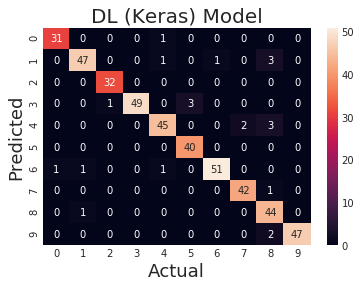

In [12]:
from keras.layers.core import Dropout

model = Sequential()
model.add(Dense(128, input_shape=(train_dim_two,)))
model.add(Activation('tanh'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit model
batch_size = 25
num_epoch = 10
val_spl = 0.2

history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, epochs=num_epoch,
                    verbose=1, validation_split = val_spl)

print(50*'-')
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

[[Back to TOC]](#Table-of-Contents)

## Blind Testing

We can perform completely blind testing by making our own test data, by using the previous code we wrote to generate _fake_ ones and sevens. In the following code cells, we create these fake data and compare the model predictions to the actual classifications.

-----

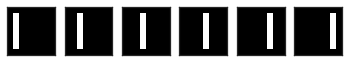

In [13]:
# Create fake ones
ones = hd.make_ones()
hd.plot_numbers(ones)

In [14]:
# Create input label data (all ones)
y_ones = np.empty(ones.shape[0], dtype=np.int8)
y_ones.fill(1)

# Convert to categorical labels
y_onesc = np_utils.to_categorical(y_ones, num_classes)

In [15]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(ones, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_ones)
print(y_pred)

[1 1 1 1 1 1]
[4 6 1 1 9 7]


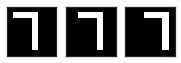

In [16]:
# Create fake sevens
sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [17]:
# Create input label data (all sevens)
y_sevens = np.empty(sevens.shape[0], dtype=np.int8)
y_sevens.fill(7)

# Convert to categorical labels
y_sevensc = np_utils.to_categorical(y_sevens, num_classes)

In [18]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(sevens, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_sevens)
print(y_pred)

[7 7 7]
[3 0 7]


-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we introduced deep learning by using the Keras framework. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the activation function to `tanh` or `relu` in the simple model. How do the results change, can you explain why?

2. Change the batch size and number of epochs for the simple model. How do the results change? Is it how you would naively expect?

3. Modify the complex model by changing the number of output features in the intermediate layers, the activation functions, or the number of layers. How do the results change?

More Advanced.

4. Change the network to use a convolution. It might be easier to retain the two-dimensional nature of the input data and apply a two-dimensional convolution.

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

4. An [overview][1] of the different types of deep learning networks
1. A set of [deep learning notebooks][2]
23. A discussion of [neural network][3] training algorithms

-----

[1]: http://www.asimovinstitute.org/neural-network-zoo/
[2]: https://github.com/fchollet/deep-learning-with-python-notebooks

[3]: https://www.neuraldesigner.com/blog/5_algorithms_to_train_a_neural_network

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode